In [39]:
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import datasets as ds
import seaborn as sb
import matplotlib.pyplot as plt

In [42]:
data = ds.load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [44]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [45]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

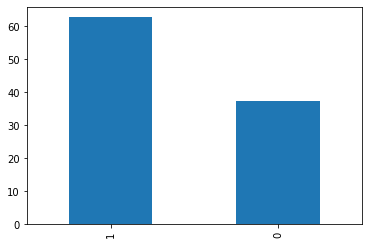

In [51]:
(df.target.value_counts(1)*100).plot(kind='bar')

In [53]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [54]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

<AxesSubplot:>

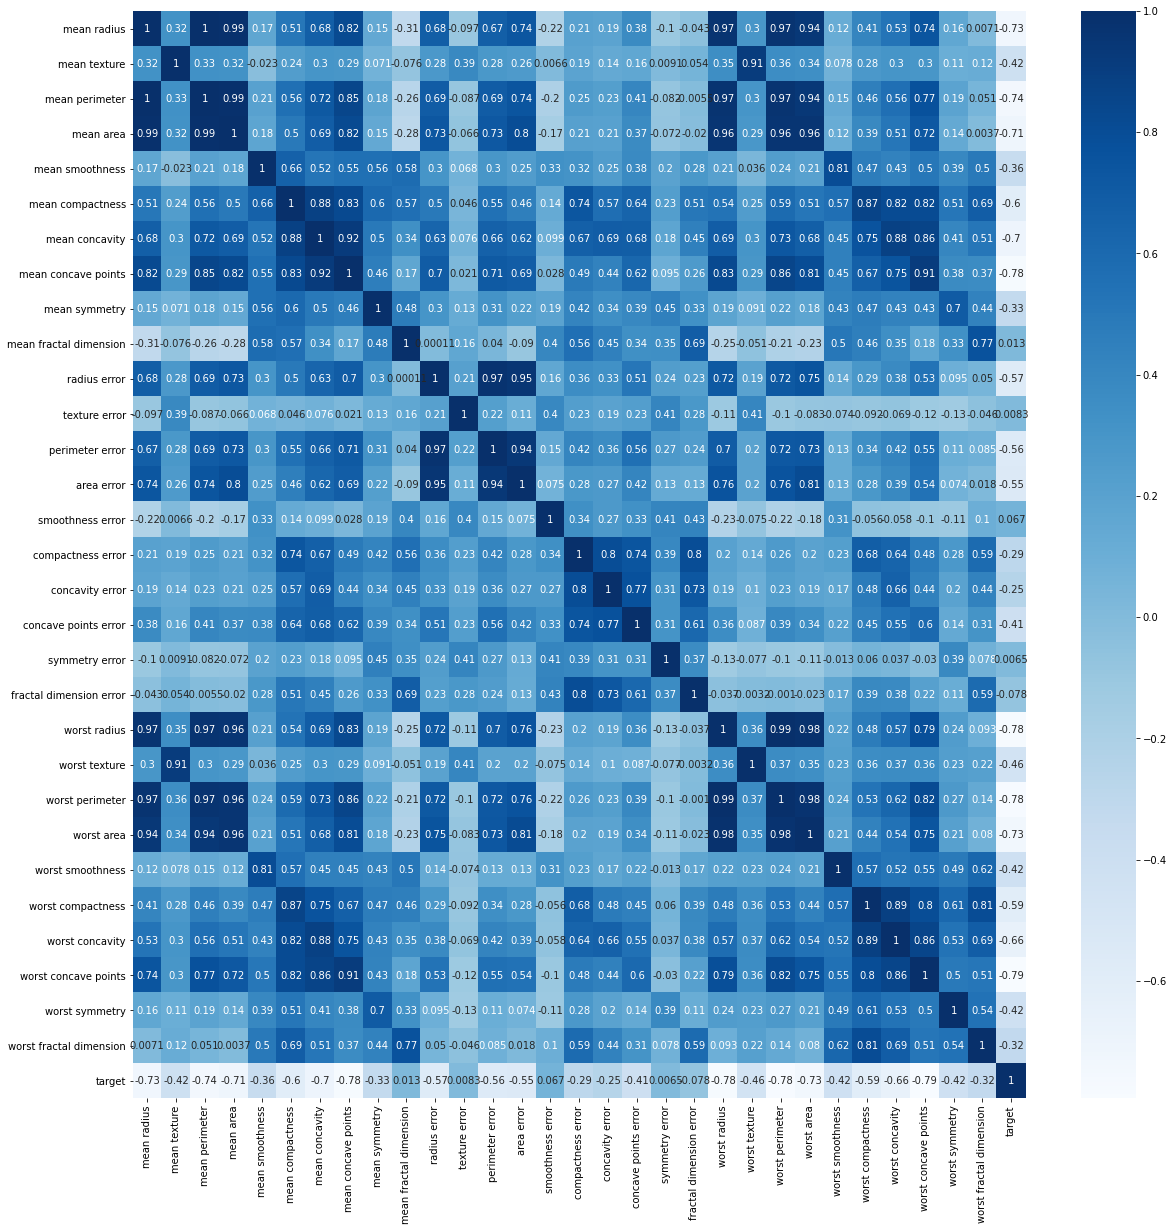

In [55]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(corr,cmap='Blues',annot=True,ax=ax)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X= df.drop('target',axis=1)
y= df['target']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [61]:
# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
# class_weight {0:0.2,1:0.6}dict or ‘balanced’, default=None
# random_state int, RandomState instance, default=None

# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’.

# To choose a solver, you might want to consider the following aspects:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# ‘liblinear’ is limited to one-versus-rest schemes.


clf = LogisticRegression(solver='liblinear')
rfe = RFE(clf, 15)
rfe = rfe.fit(X_train, y_train)

c:\users\king\anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('mean radius', True, 1),
 ('mean texture', True, 1),
 ('mean perimeter', False, 7),
 ('mean area', False, 10),
 ('mean smoothness', False, 3),
 ('mean compactness', False, 8),
 ('mean concavity', True, 1),
 ('mean concave points', True, 1),
 ('mean symmetry', True, 1),
 ('mean fractal dimension', False, 15),
 ('radius error', True, 1),
 ('texture error', True, 1),
 ('perimeter error', True, 1),
 ('area error', True, 1),
 ('smoothness error', False, 14),
 ('compactness error', False, 11),
 ('concavity error', False, 6),
 ('concave points error', False, 9),
 ('symmetry error', False, 12),
 ('fractal dimension error', False, 16),
 ('worst radius', True, 1),
 ('worst texture', True, 1),
 ('worst perimeter', True, 1),
 ('worst area', False, 13),
 ('worst smoothness', False, 5),
 ('worst compactness', False, 4),
 ('worst concavity', True, 1),
 ('worst concave points', True, 1),
 ('worst symmetry', False, 2),
 ('worst fractal dimension', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]
X_test = X_test[col]

In [65]:
X_train.shape ,X_test.shape

((398, 15), (171, 15))

In [66]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
# pip install scikit-plot
import scikitplot as skplt

In [67]:
clf = LogisticRegression(solver='liblinear')
clf = clf.fit(X_train, y_train)

In [68]:
y_pred = clf.predict(X_test)

In [70]:
y_probas = clf.predict_proba(X_test)

In [72]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.94      0.87      0.90        69
      benign       0.92      0.96      0.94       102

    accuracy                           0.92       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



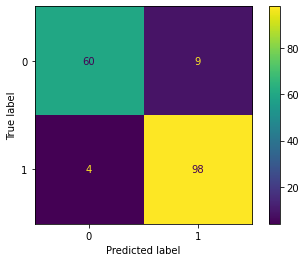

In [30]:
plot_confusion_matrix(clf, X_test, y_test)

In [76]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9151747655583974

c:\users\king\anaconda3\envs\keras\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

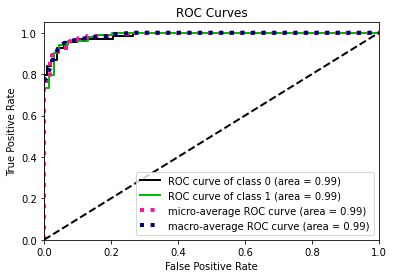

In [77]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)